<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [6]:
from sklearn.datasets import make_blobs

#рандомный датасек для бинарной классификации
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

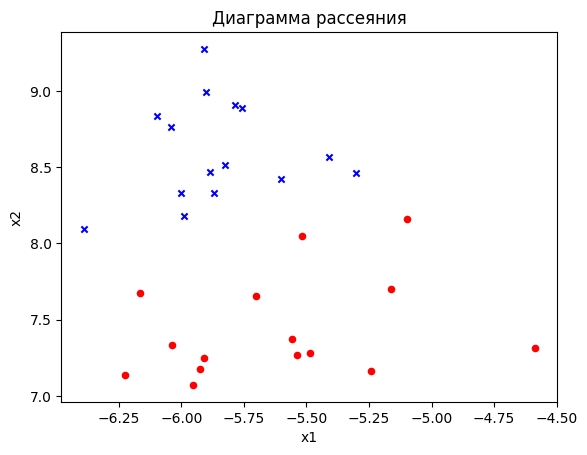

In [8]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)

plt.title("Диаграмма рассеяния")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Линейное ядро или без ядра

In [11]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [12]:
print(f"Коэффициенты линейной функции: {svm_linear.coef_}")
print(f"Свободный коэффициент: {svm_linear.intercept_}")

Коэффициенты линейной функции: [[-2.49920793  6.14683189]]
Свободный коэффициент: [-64.2533988]


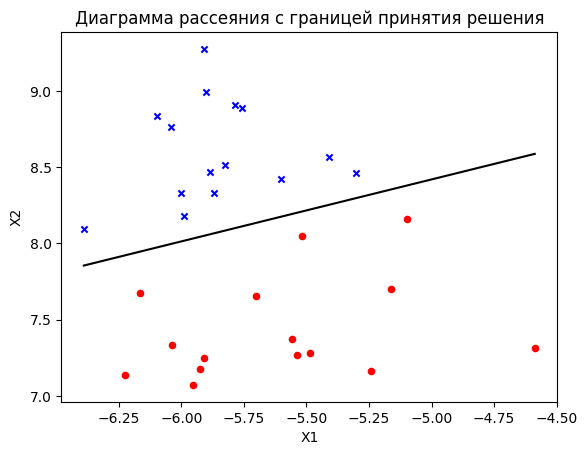

In [21]:
X1 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

#-b0 / b2 - b1 * X1 /b2
plt.plot(X1,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [17]:
print(f"Координаты опорных векторов: {svm_linear.support_vectors_}")
print(f"Индексы опорных векторов в X: {svm_linear.support_}")
print(f"Кол-во опорных векторов: {svm_linear.n_support_}")

Координаты опорных векторов: [[-5.51629264  8.04763857]
 [-5.30025769  8.46071981]
 [-5.9879581   8.18112559]]
Индексы опорных векторов в X: [ 0  8 29]
Кол-во опорных векторов: [1 2]


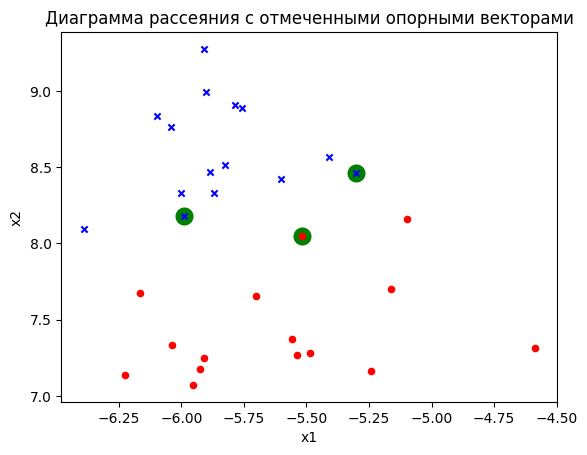

In [20]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [107]:
def plot_decision_regions(X, y, model):
  plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

  plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
  plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)

  #Генерируем сетку
  X1 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
  X2 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

  X1_grid, X2_grid = np.meshgrid(X1, X2)
  Z = model.decision_function(np.array([X1_grid.ravel(), X2_grid.ravel()]).T).reshape(X1_grid.shape)
  plt.contour(X1_grid, X2_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
  plt.contourf(X1_grid, X2_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

  plt.title("Диаграмма рассеяния c линией разделения и зазором")
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.show()

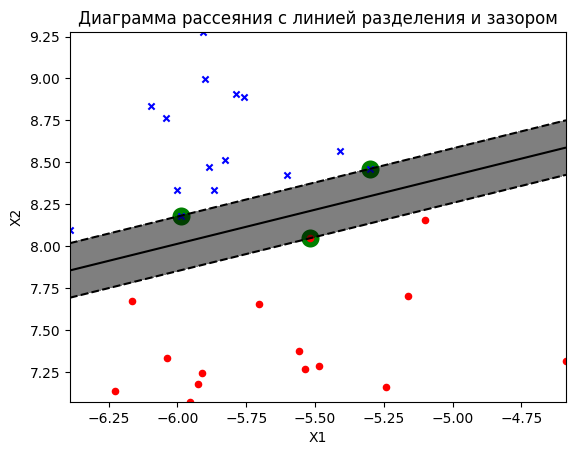

In [31]:
plot_decision_regions(X, y, svm_linear)

In [36]:
from sklearn import metrics

y_pred =  svm_linear.predict(X)

print(f"Точность модели: {metrics.accuracy_score(y, y_pred)}")
print(f"Матрица классификации:\n {metrics.confusion_matrix(y, y_pred)}")

Точность модели: 1.0
Матрица классификации:
 [[15  0]
 [ 0 15]]


Значение функции гипотезы в этой точке: [-5.03131797]
Предсказание класса в ней: [0]


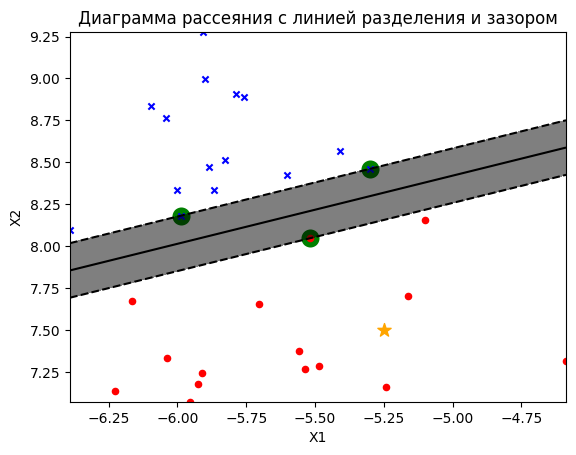

Значение функции гипотезы в этой точке: [-0.41107526]
Предсказание класса в ней: [0]


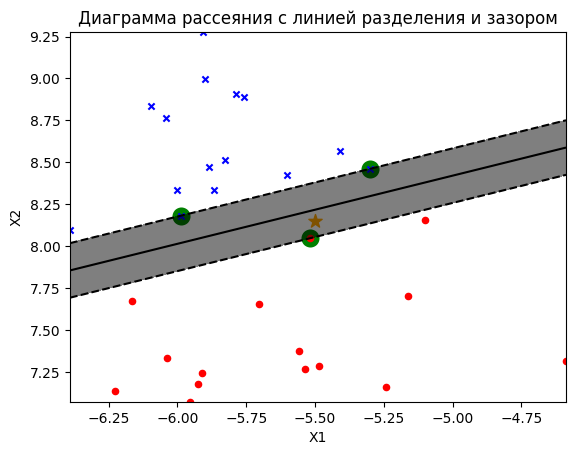

Значение функции гипотезы в этой точке: [2.07801388]
Предсказание класса в ней: [1]


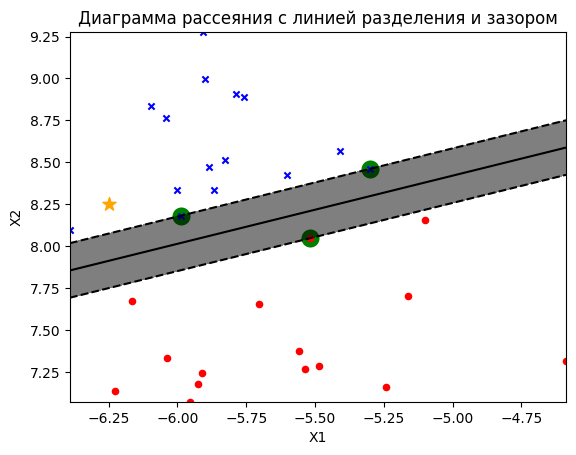

In [51]:
observation = [
  [-5.25, 7.5],
  [-5.5, 8.15],
  [-6.25, 8.25]
]

for obs in observation:
  print(f"Значение функции гипотезы в этой точке: {svm_linear.decision_function([obs])}")
  print(f"Предсказание класса в ней: {svm_linear.predict([obs])}")
  plt.scatter(obs[0], obs[1], marker='*', s=100, color='orange')
  plot_decision_regions(X, y, svm_linear)
  plt.show()

C = 0.01, Accuracy = 0.7


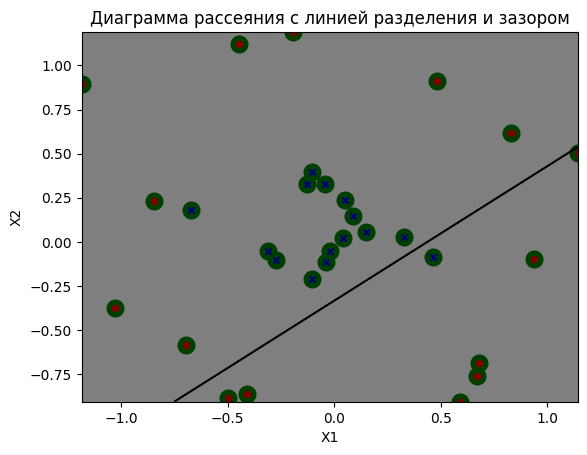

C = 0.1, Accuracy = 0.7


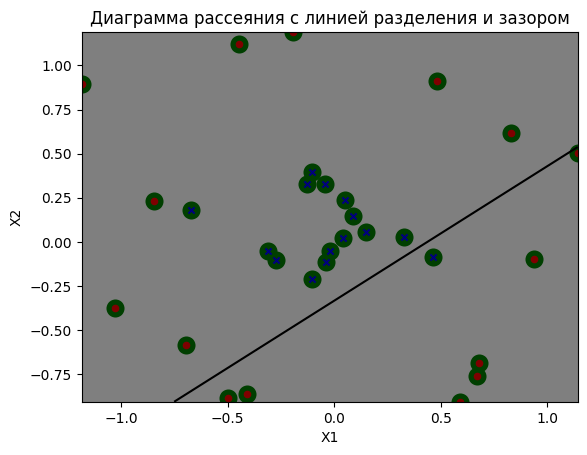

C = 1, Accuracy = 0.7


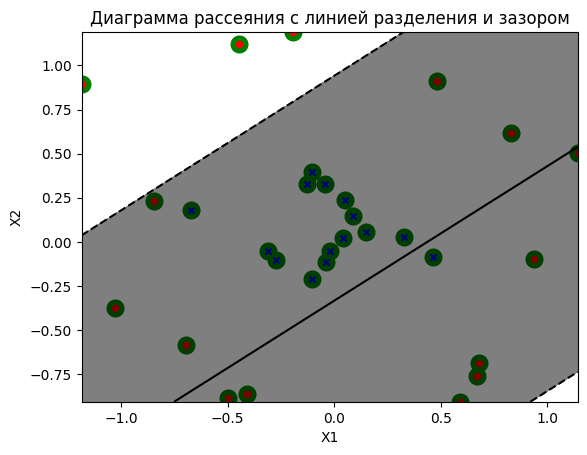

C = 10, Accuracy = 0.7


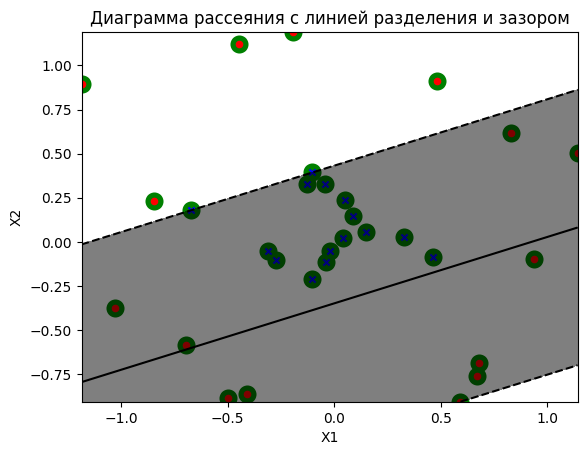

C = 100, Accuracy = 0.7


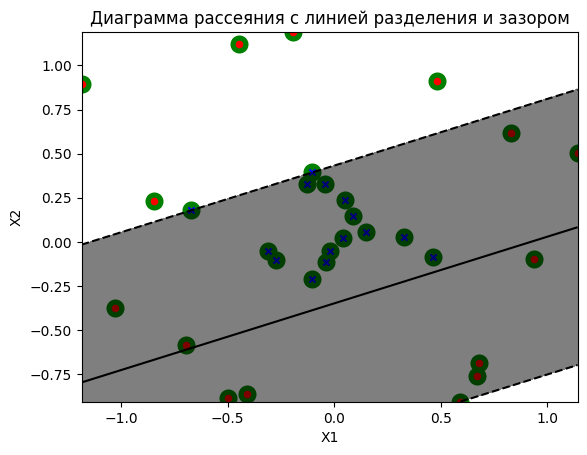

C = 1000, Accuracy = 0.7


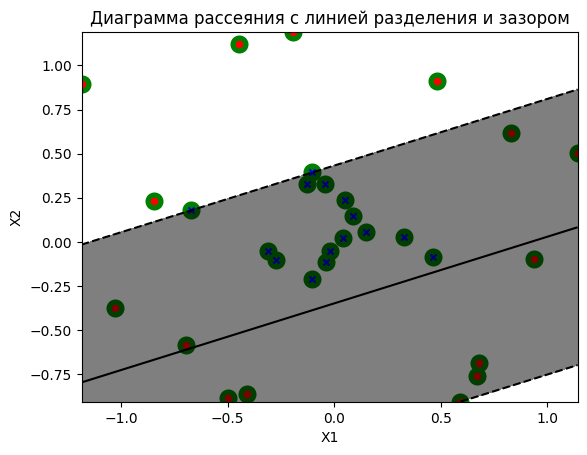

In [91]:
for C_val in [0.01, 0.1, 1, 10, 100, 1000]:
    svm = SVC(kernel='linear', C=C_val)
    svm.fit(X, y)
    print(f"C = {C_val}, Accuracy = {metrics.accuracy_score(y, svm.predict(X))}")
    plot_decision_regions(X, y, svm)

Линейно неразделимые данные с зазором

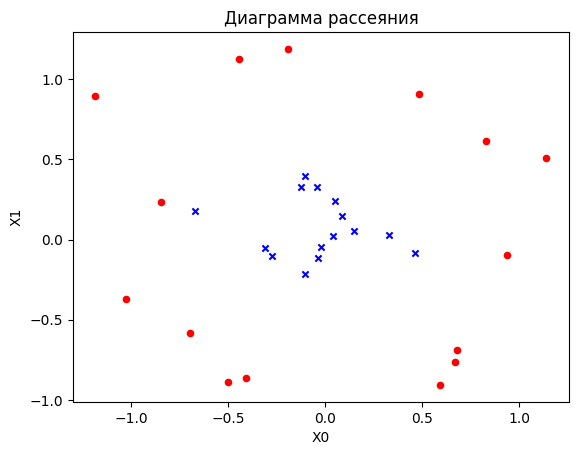

In [64]:
from sklearn.datasets import make_circles

X_rbf, y_rbf = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X_rbf[:, 0][y_rbf==0], X_rbf[:, 1][y_rbf==0], marker="o", c='r', s=20)
plt.scatter(X_rbf[:, 0][y_rbf==1], X_rbf[:, 1][y_rbf==1], marker="x", c='b', s=20)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [65]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X_rbf, y_rbf)

In [66]:
print(f"Координаты опорных векторов: {svm_rbf.support_vectors_}")
print(f"Индексы опорных векторов в X: {svm_rbf.support_}")
print(f"Кол-во опорных векторов: {svm_rbf.n_support_}")

Координаты опорных векторов: [[ 0.9388294  -0.09554628]
 [-0.84682371  0.23287306]
 [-0.19166925  1.18895776]
 [-0.69539045 -0.58523359]
 [ 0.68060508 -0.68615145]
 [ 0.48354792  0.91063288]
 [-0.66975235  0.17866445]
 [ 0.46427295 -0.08540628]]
Индексы опорных векторов в X: [11 20 21 23 28 29 25 27]
Кол-во опорных векторов: [6 2]


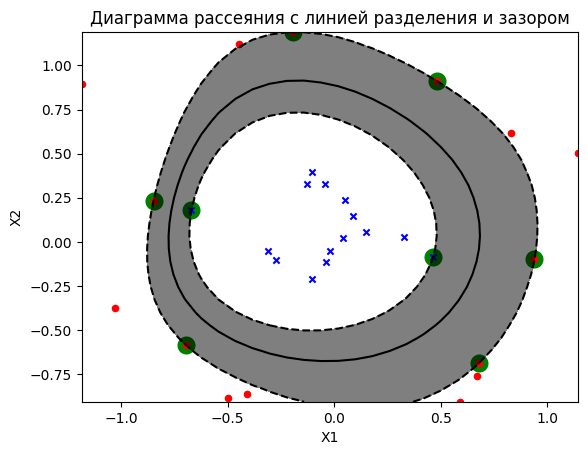

In [80]:
plot_decision_regions(X_rbf, y_rbf, svm_rbf)

In [82]:
y_rbf_pred =  svm_rbf.predict(X)

print(f"Точность модели: {metrics.accuracy_score(y_rbf, y_rbf_pred)}")
print(f"Матрица классификации:\n {metrics.confusion_matrix(y_rbf, y_rbf_pred)}")

Точность модели: 1.0
Матрица классификации:
 [[15  0]
 [ 0 15]]


Kernel: linear, Accuracy: 0.7


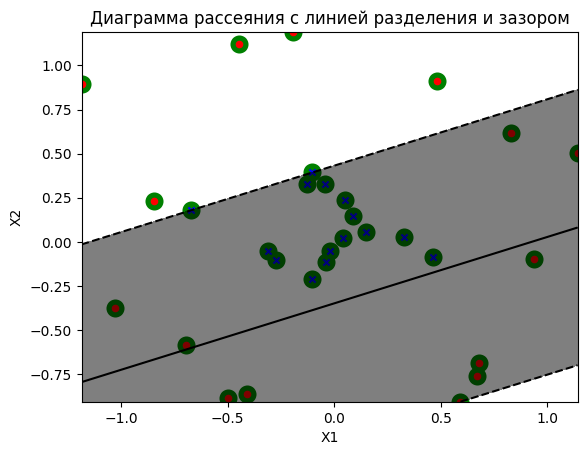

Kernel: poly, Accuracy: 0.7


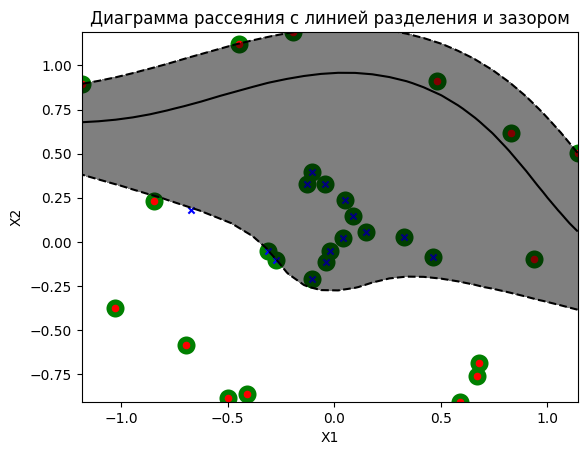

Kernel: rbf, Accuracy: 1.0


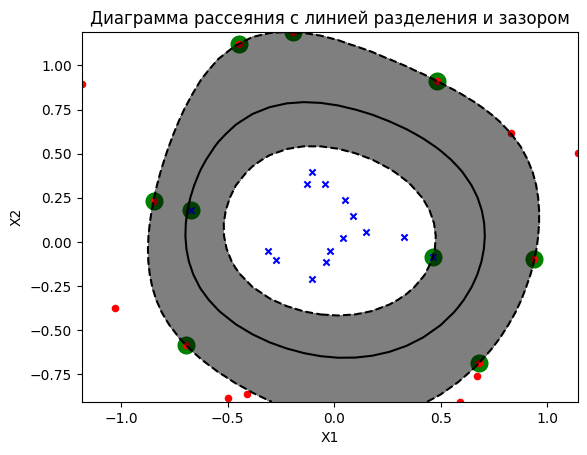

Kernel: sigmoid, Accuracy: 0.5


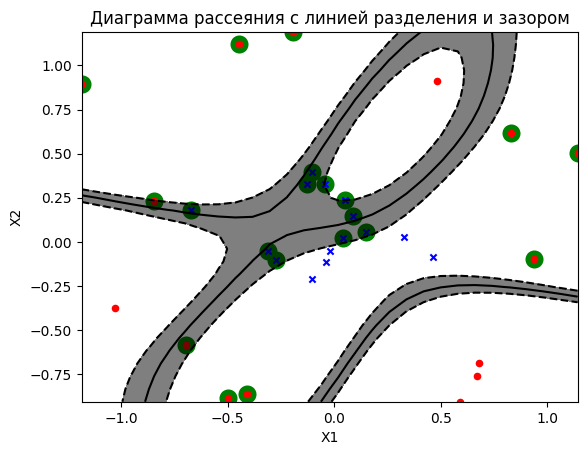

In [90]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(kernel=kernel, C=10, degree=3)
    model.fit(X_rbf, y_rbf)
    print(f"Kernel: {kernel}, Accuracy: {metrics.accuracy_score(y_rbf, model.predict(X_rbf))}")
    plot_decision_regions(X_rbf, y_rbf, model)


Данные без зазора

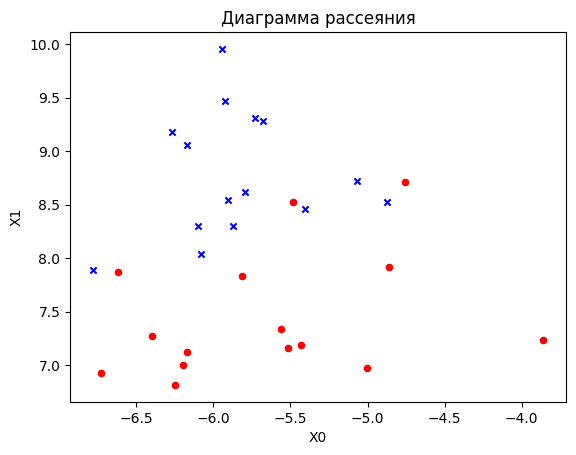

In [83]:
X_3, y_3 = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X_3[:, 0][y_3==0], X_3[:, 1][y_3==0], marker="o", c='r', s=20)
plt.scatter(X_3[:, 0][y_3==1], X_3[:, 1][y_3==1], marker="x", c='b', s=20)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

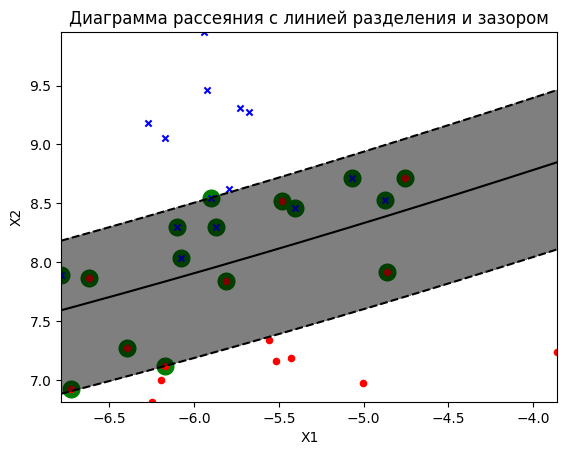

In [84]:
svm_poly = SVC(kernel='poly', degree=4, C=3).fit(X_3, y_3)
plot_decision_regions(X_3, y_3, svm_poly)

In [85]:
print(f"Координаты опорных векторов: {svm_poly.support_vectors_}")
print(f"Индексы опорных векторов в X: {svm_poly.support_}")
print(f"Кол-во опорных векторов: {svm_poly.n_support_}")

Координаты опорных векторов: [[-5.48340969  8.52238291]
 [-5.81131684  7.83707625]
 [-4.75416287  8.71477783]
 [-4.8626287   7.91334101]
 [-6.61796227  7.86603938]
 [-6.72548855  6.9245208 ]
 [-6.17045201  7.11889057]
 [-6.39507181  7.27123257]
 [-4.87623828  8.52709604]
 [-6.10105227  8.30178812]
 [-5.40598326  8.45958294]
 [-5.9022326   8.54667052]
 [-6.78315809  7.8895225 ]
 [-5.06807681  8.71832644]
 [-5.86995333  8.30147083]
 [-6.07971401  8.03780617]]
Индексы опорных векторов в X: [ 0  5 12 14 16 21 24 28  8 10 11 15 17 22 23 29]
Кол-во опорных векторов: [8 8]


In [86]:
y_poly_pred =  svm_rbf.predict(X)

print(f"Точность модели: {metrics.accuracy_score(y_3, y_poly_pred)}")
print(f"Матрица классификации:\n {metrics.confusion_matrix(y_3, y_poly_pred)}")

Точность модели: 0.4666666666666667
Матрица классификации:
 [[7 8]
 [8 7]]


C = 0.01, Accuracy = 0.7666666666666667


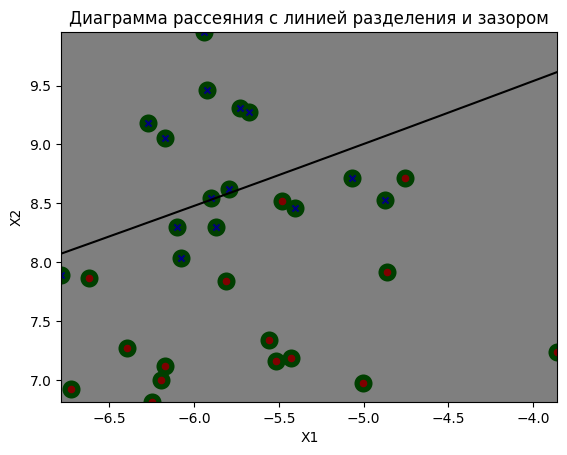

C = 1, Accuracy = 0.8


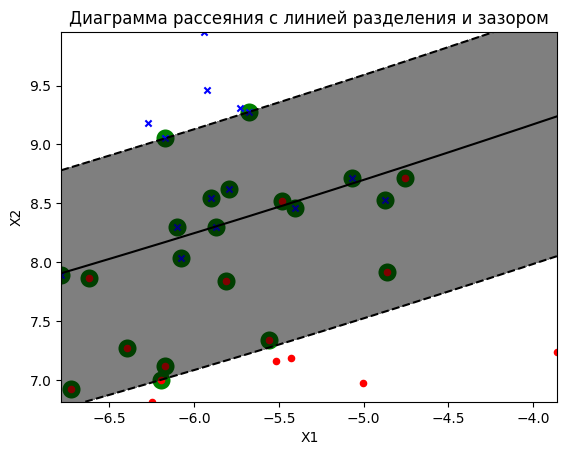

C = 100, Accuracy = 0.9


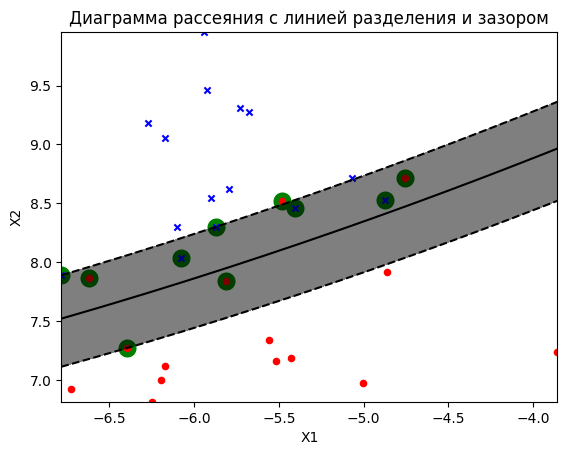

C = 1000, Accuracy = 0.8666666666666667


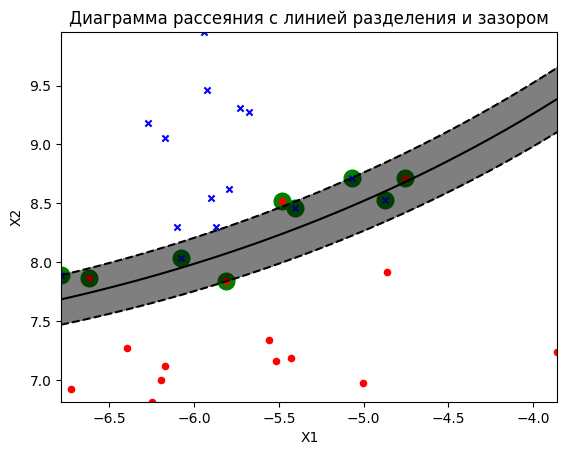

In [108]:
for C_val in [0.01, 1, 100, 1000]:
    model = SVC(kernel='poly', degree=4, C=C_val)
    model.fit(X_3, y_3)
    print(f"C = {C_val}, Accuracy = {metrics.accuracy_score(y_3, model.predict(X_3))}")
    plot_decision_regions(X_3, y_3, model)

In [96]:
from sklearn.svm import LinearSVC

for C_val in [0.01, 1, 100, 1000]:
  model = LinearSVC(C=C_val)
  model.fit(X_3, y_3)
  print(f"Accuracy: {metrics.accuracy_score(y_3, model.predict(X_3))}")

Accuracy: 0.7
Accuracy: 0.8
Accuracy: 0.9
Accuracy: 0.8666666666666667


Большой датасет

In [102]:
from sklearn.datasets import make_classification

X_big, y_big = make_classification(n_samples=1000, n_features=5, n_informative=3, n_classes=2, random_state=42)

for kernel in ['linear', 'rbf', 'poly']:
  for C in [0.1, 1, 10]:
    start = time.time()
    model = SVC(kernel=kernel, C=C).fit(X_big, y_big)
    print(f"Kernel: {kernel}, C: {C}, Accuracy: {metrics.accuracy_score(y_big, model.predict(X_big))}, Time: {(time.time() - start):.4f} sec")


Kernel: linear, C: 0.1, Accuracy: 0.911, Time: 0.0563 sec
Kernel: linear, C: 1, Accuracy: 0.907, Time: 0.0660 sec
Kernel: linear, C: 10, Accuracy: 0.906, Time: 0.1121 sec
Kernel: rbf, C: 0.1, Accuracy: 0.935, Time: 0.1262 sec
Kernel: rbf, C: 1, Accuracy: 0.948, Time: 0.0739 sec
Kernel: rbf, C: 10, Accuracy: 0.953, Time: 0.0370 sec
Kernel: poly, C: 0.1, Accuracy: 0.905, Time: 0.0979 sec
Kernel: poly, C: 1, Accuracy: 0.904, Time: 0.0913 sec
Kernel: poly, C: 10, Accuracy: 0.917, Time: 0.0469 sec


Множественная классификация

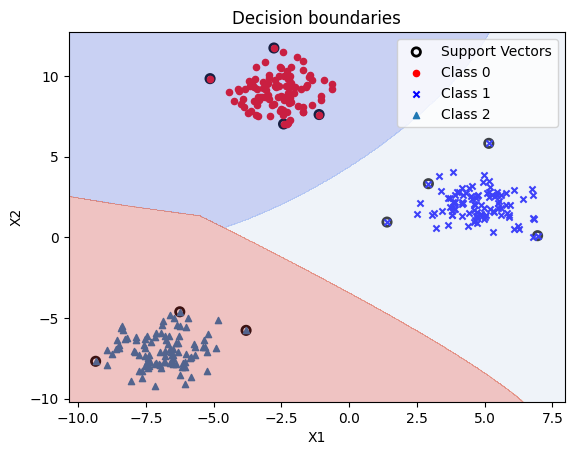

In [109]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], linewidth=2, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=20, label='Class 0')
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=20, label='Class 1')
    if len(np.unique(y)) > 2:
        for class_idx in np.unique(y)[2:]:
            plt.scatter(X[:, 0][y == class_idx], X[:, 1][y == class_idx], marker="^", s=20, label=f'Class {class_idx}')

    # Генерация сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.title("Decision boundaries")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

X_multi, y_multi = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)
model_multi = SVC(kernel='rbf', C=10)
model_multi.fit(X_multi, y_multi)

plot_decision_regions(X_multi, y_multi, model_multi)
